In [9]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('../data/merged_data.csv')

In [6]:
data.head(5)

,road,id,model_type,condition,name,lat,lon,length
0,N1,1,sourcesink,NaN,Start of Road after Jatrabari Flyover infront...,23.706028,90.443333,0.8140
1,N1,2,link,NaN,link 2,23.702917,90.450417,0.0080
2,N1,3,link,NaN,link 3,23.702778,90.450472,0.1780
3,N1,4,link,NaN,link 4,23.702139,90.451972,1.0000
4,N1,5,bridge,A,. id 5,23.697889,90.460583,0.0113


In [12]:
def create_graph(data):
    G = nx.Graph()
    
    # Add nodes with positions
    for idx, row in data.iterrows():
        G.add_node(row['id'], pos=(row['lon'], row['lat']), label=row['name'])
    
    # Add edges for sequential nodes within the same road
    roads = data.groupby('road')
    for road_name, group in roads:
        sorted_group = group.sort_values(by='id')  # Ensure nodes are added sequentially
        for i in range(len(sorted_group) - 1):
            G.add_edge(sorted_group.iloc[i]['id'], sorted_group.iloc[i + 1]['id'])
    
    # Handle intersections: connect the end of one road to the start of another if they have the same name in the description
    for idx, row in data.iterrows():
        if 'intersection' in row['model_type'].lower():
            # Find roads mentioned in the description
            connected_roads = [r.strip() for r in row['name'].split('and')]
            if len(connected_roads) == 2:
                road1, road2 = connected_roads
                # Find the nodes at the ends of these roads
                road1_nodes = data[(data['road'] == road1) & (data['model_type'] != 'intersection')]
                road2_nodes = data[(data['road'] == road2) & (data['model_type'] != 'intersection')]
                if not road1_nodes.empty and not road2_nodes.empty:
                    road1_end_node = road1_nodes.iloc[-1]['id']
                    road2_start_node = road2_nodes.iloc[0]['id']
                    # Add edge between these nodes
                    G.add_edge(road1_end_node, road2_start_node)
    return G


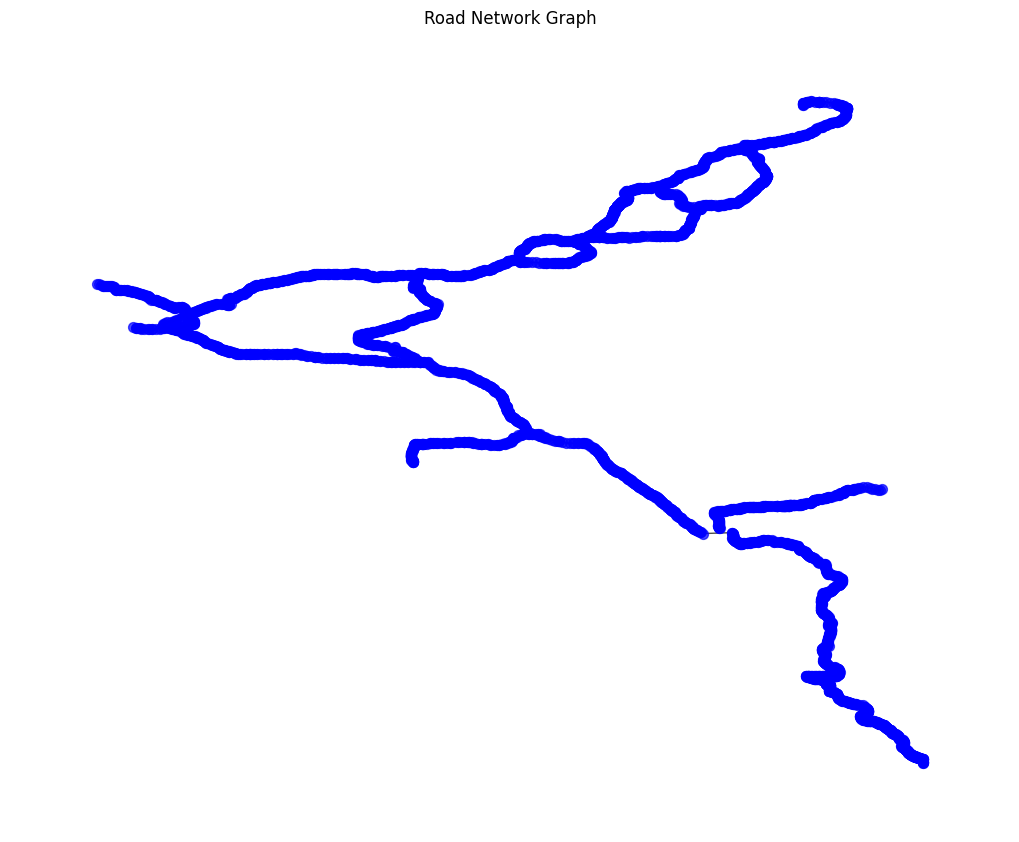

In [16]:
A = create_graph(data)
plt.figure(figsize=(10, 8))
pos = nx.get_node_attributes(A, 'pos')
labels = nx.get_node_attributes(A, 'label')
nx.draw(A, pos, node_size=50, with_labels=False, node_color='blue', alpha=0.7)
plt.title('Road Network Graph')
plt.show()

In [ ]:

    G = nx.Graph()
    
    # Add nodes with positions
    for idx, row in data.iterrows():
        G.add_node(row['id'], pos=(row['lon'], row['lat']), label=row['name'])
    
    # Add edges for sequential nodes within the same road
    roads = data.groupby('road')
    for road_name, group in roads:
        sorted_group = group.sort_values(by='id')  # Ensure nodes are added sequentially
        for i in range(len(sorted_group) - 1):
            G.add_edge(sorted_group.iloc[i]['id'], sorted_group.iloc[i + 1]['id'])
    
    # Handle intersections: connect the end of one road to the start of another if they have the same name in the description
    for idx, row in data.iterrows():
        if 'intersection' in row['model_type'].lower():
            # Find roads mentioned in the description
            connected_roads = [r.strip() for r in row['name'].split('and')]
            if len(connected_roads) == 2:
                road1, road2 = connected_roads
                # Find the nodes at the ends of these roads
                road1_nodes = data[(data['road'] == road1) & (data['model_type'] != 'intersection')]
                road2_nodes = data[(data['road'] == road2) & (data['model_type'] != 'intersection')]
                if not road1_nodes.empty and not road2_nodes.empty:
                    road1_end_node = road1_nodes.iloc[-1]['id']
                    road2_start_node = road2_nodes.iloc[0]['id']
                    # Add edge between these nodes
                    G.add_edge(road1_end_node, road2_start_node)